### Data import

In [3]:
import kagglehub
path = kagglehub.dataset_download("mahdimashayekhi/fake-news-detection-dataset")
print("Path to dataset files:", path)

import pandas as pd



c:\Users\Alicja\anaconda3\envs\new_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Alicja\.cache\kagglehub\datasets\mahdimashayekhi\fake-news-detection-dataset\versions\1


In [22]:
path = "C:\\Users\\Alicja\\.cache\\kagglehub\\datasets\\mahdimashayekhi\\fake-news-detection-dataset\\versions\\1\\fake_news_dataset.csv"

In [23]:
df = pd.read_csv(path)
df.head()

,title,text,date,source,author,category,label
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake


## Data preparation

In [24]:
df['fake'] = df['label'].map({"real": 0, "fake": 1})
df

,title,text,date,source,author,category,label,fake
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real,0
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake,1
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake,1
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake,1
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake,1
...,...,...,...,...,...,...,...,...
19995,House party born.,hit and television I change very our happy doo...,2024-12-04,BBC,Gary Miles,Entertainment,fake,1
19996,Though nation people maybe price box.,fear most meet rock even sea value design stan...,2024-05-26,Daily News,Maria Mcbride,Entertainment,real,0
19997,Yet exist with experience unit.,activity loss very provide eye west create wha...,2023-04-17,BBC,Kristen Franklin,Entertainment,real,0
19998,School wide itself item.,term point general common training watch respo...,2024-06-30,Reuters,David Wise,Health,fake,1


In [25]:
print(df.shape)
print(df.info()) 

(20000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     20000 non-null  object
 1   text      20000 non-null  object
 2   date      20000 non-null  object
 3   source    19000 non-null  object
 4   author    19000 non-null  object
 5   category  20000 non-null  object
 6   label     20000 non-null  object
 7   fake      20000 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.2+ MB
None


In [26]:
print(df.isnull().sum())

title          0
text           0
date           0
source      1000
author      1000
category       0
label          0
fake           0
dtype: int64


In [27]:
empty_text = df[df['text'].isnull() | (df['text'].str.strip() == '')]
empty_title = df[df['title'].isnull() | (df['title'].str.strip() == '')]

print(f"Liczba pustych tekstów: {len(empty_text)}")
print(f"Liczba pustych tytułów: {len(empty_title)}")


Liczba pustych tekstów: 0
Liczba pustych tytułów: 0


### Removing empty values.

### Removing duplicates.

In [28]:
df = df.drop_duplicates()
df.head()

,title,text,date,source,author,category,label,fake
0,Foreign Democrat final.,more tax development both store agreement lawy...,2023-03-10,NY Times,Paula George,Politics,real,0
1,To offer down resource great point.,probably guess western behind likely next inve...,2022-05-25,Fox News,Joseph Hill,Politics,fake,1
2,Himself church myself carry.,them identify forward present success risk sev...,2022-09-01,CNN,Julia Robinson,Business,fake,1
3,You unit its should.,phone which item yard Republican safe where po...,2023-02-07,Reuters,Mr. David Foster DDS,Science,fake,1
4,Billion believe employee summer how.,wonder myself fact difficult course forget exa...,2023-04-03,CNN,Austin Walker,Technology,fake,1


In [29]:
df = df.reset_index(drop=True)
print(df.shape)

(20000, 8)


In [30]:
df = df[['title', 'text', 'fake']]

print(df.head())
print(df.columns)

df.info()

                                  title  \
0               Foreign Democrat final.   
1   To offer down resource great point.   
2          Himself church myself carry.   
3                  You unit its should.   
4  Billion believe employee summer how.   

                                                text  fake  
0  more tax development both store agreement lawy...     0  
1  probably guess western behind likely next inve...     1  
2  them identify forward present success risk sev...     1  
3  phone which item yard Republican safe where po...     1  
4  wonder myself fact difficult course forget exa...     1  
Index(['title', 'text', 'fake'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20000 non-null  object
 1   text    20000 non-null  object
 2   fake    20000 non-null  int64 
dtypes: int64(1), object(2)
memory usa

In [31]:
print(df.columns.tolist())

['title', 'text', 'fake']


In [32]:
df_eda=df.copy()

In [33]:

df["title_text"] = df["title"].fillna('') + " " + df["text"].fillna('')
df = df[["title_text", "fake"]]

# Zapis do CSV 
#df[["title_text", "fake"]].to_csv("fake-news-detection-dataset_ready.csv", index=False)

In [34]:
df.head()

,title_text,fake
0,Foreign Democrat final. more tax development b...,0
1,To offer down resource great point. probably g...,1
2,Himself church myself carry. them identify for...,1
3,You unit its should. phone which item yard Rep...,1
4,Billion believe employee summer how. wonder my...,1


## EDA

Liczebność klas (0=real, 1=fake):
 fake
0     9944
1    10056
Name: count, dtype: int64

Udział procentowy:
 fake
0    49.72
1    50.28
Name: proportion, dtype: float64


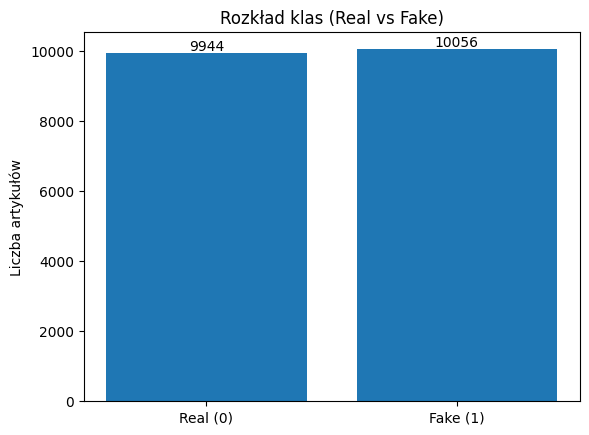

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

counts = df["fake"].value_counts().sort_index()
props = df["fake"].value_counts(normalize=True).sort_index() * 100

print("Liczebność klas (0=real, 1=fake):\n", counts)
print("\nUdział procentowy:\n", props.round(2))

labels = ["Real (0)", "Fake (1)"]
values = [counts.get(0, 0), counts.get(1, 0)]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_title("Rozkład klas (Real vs Fake)")
ax.set_ylabel("Liczba artykułów")
for i, v in enumerate(values):
    ax.text(i, v, str(v), ha="center", va="bottom")
plt.show()

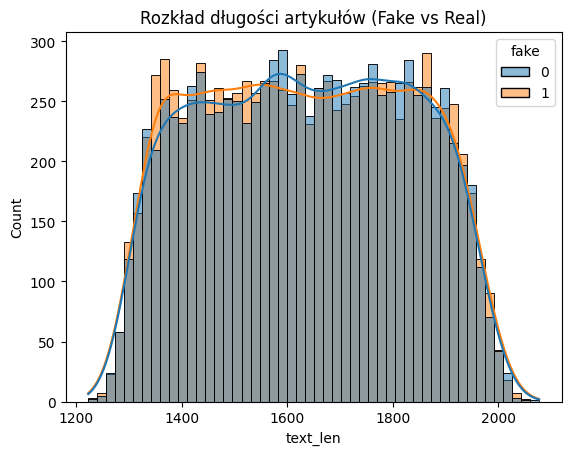

In [36]:
df_eda["text_len"] = df_eda["text"].str.len()
sns.histplot(data=df_eda, x="text_len", hue="fake", bins=50, kde=True)
plt.title("Rozkład długości artykułów (Fake vs Real)")
plt.show()

text_len_chars                                                            \
              count         mean         std     min      25%     50%     75%   
fake                                                                            
0            9944.0  1636.582562  191.544605  1234.0  1474.00  1636.0  1799.0   
1           10056.0  1633.665573  194.141594  1223.0  1467.75  1631.0  1798.0   

             title_len_chars             ... text_len_words         \
         max           count       mean  ...            75%    max   
fake                                     ...                         
0     2077.0          9944.0  36.109413  ...          275.0  300.0   
1     2054.0         10056.0  35.833333  ...          275.0  300.0   

     title_len_words                                               
               count      mean       std  min  25%  50%  75%  max  
fake                                                               
0             9944.0  5.508246  1.444934  3.0  4.0  6.0  7.0  8.0  
1            10056.0  5.488564  1.455410  3.0  4.0  5.0  7.0  8.0  

[2 rows x 32 columns]

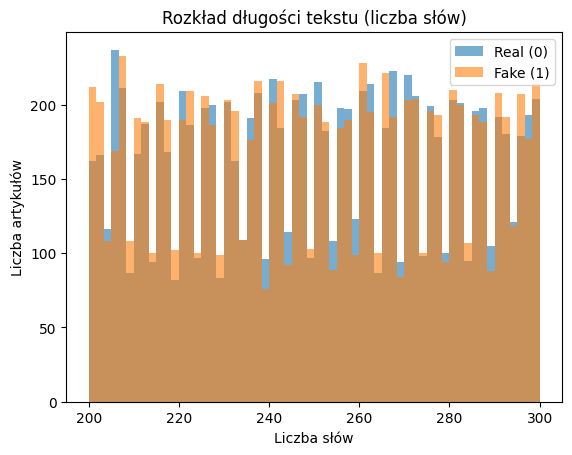

C:\Users\Alicja\AppData\Local\Temp\ipykernel_9784\2048335607.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_box, labels=["Real (0)", "Fake (1)"], showfliers=False)


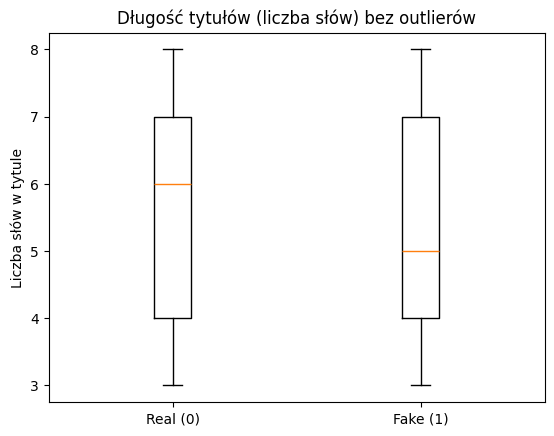

In [37]:
df_eda["text_len_chars"]  = df_eda["text"].str.len()
df_eda["title_len_chars"] = df_eda["title"].str.len()
df_eda["text_len_words"]  = df_eda["text"].str.split().str.len()
df_eda["title_len_words"] = df_eda["title"].str.split().str.len()

desc = df_eda.groupby("fake")[["text_len_chars","title_len_chars","text_len_words","title_len_words"]].describe()
display(desc)

# Histogram 
bins = 60
fig, ax = plt.subplots()
ax.hist(df_eda.loc[df_eda["fake"]==0, "text_len_words"], bins=bins, alpha=0.6, label="Real (0)")
ax.hist(df_eda.loc[df_eda["fake"]==1, "text_len_words"], bins=bins, alpha=0.6, label="Fake (1)")
ax.set_title("Rozkład długości tekstu (liczba słów)")
ax.set_xlabel("Liczba słów")
ax.set_ylabel("Liczba artykułów")
ax.legend()
plt.show()

# Boxplot 
data_box = [df_eda.loc[df_eda["fake"]==0, "title_len_words"].dropna(),
            df_eda.loc[df_eda["fake"]==1, "title_len_words"].dropna()]
fig, ax = plt.subplots()
ax.boxplot(data_box, labels=["Real (0)", "Fake (1)"], showfliers=False)
ax.set_title("Długość tytułów (liczba słów) bez outlierów")
ax.set_ylabel("Liczba słów w tytule")
plt.show()

## Clearing data for modeling

In [38]:
df.columns

Index(['title_text', 'fake'], dtype='object')

In [39]:
df

,title_text,fake
0,Foreign Democrat final. more tax development b...,0
1,To offer down resource great point. probably g...,1
2,Himself church myself carry. them identify for...,1
3,You unit its should. phone which item yard Rep...,1
4,Billion believe employee summer how. wonder my...,1
...,...,...
19995,House party born. hit and television I change ...,1
19996,Though nation people maybe price box. fear mos...,0
19997,Yet exist with experience unit. activity loss ...,0
19998,School wide itself item. term point general co...,1


In [40]:
df_modeling = df
df_modeling.head()

,title_text,fake
0,Foreign Democrat final. more tax development b...,0
1,To offer down resource great point. probably g...,1
2,Himself church myself carry. them identify for...,1
3,You unit its should. phone which item yard Rep...,1
4,Billion believe employee summer how. wonder my...,1


stopwords NLTK +prepocess

In [43]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def full_preprocess(text):
    text = str(text)
    
    # 1. Tokenizacja po spacji i usuwanie znaków niealfabetycznych
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in text.split()]
    
    # 2. Usuwanie pustych tokenów i stopwords
    tokens = [word for word in tokens if word and word.lower() not in stop_words]
    
    # 3. Lematyzacja
    lemmatized = [lemmatizer.lemmatize(token.lower(), pos='v') for token in tokens]
    
    return lemmatized


df_modeling['Lemmatized Text'] = df_modeling['title_text'].apply(full_preprocess)

df_modeling.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alicja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alicja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title_text,fake,Lemmatized Text
0,Foreign Democrat final. more tax development b...,0,"[foreign, democrat, final, tax, development, s..."
1,To offer down resource great point. probably g...,1,"[offer, resource, great, point, probably, gues..."
2,Himself church myself carry. them identify for...,1,"[church, carry, identify, forward, present, su..."
3,You unit its should. phone which item yard Rep...,1,"[unit, phone, item, yard, republican, safe, po..."
4,Billion believe employee summer how. wonder my...,1,"[billion, believe, employee, summer, wonder, f..."


In [44]:
from collections import Counter

def most_common_words(tokens_series, n=15):
    all_tokens = [token for tokens in tokens_series for token in tokens]
    counter = Counter(all_tokens)
    return pd.DataFrame(counter.most_common(n), columns=['Word', 'Count'])

fake_top15 = most_common_words(df_modeling[df_modeling['fake']==1]['Lemmatized Text'], n=15)
print("Top 15 słów w Fake:")
print(fake_top15)

real_top15 = most_common_words(df_modeling[df_modeling['fake']==0]['Lemmatized Text'], n=15)
print("\nTop 15 słów w Real:")
print(real_top15)

Top 15 słów w Fake:
        Word  Count
0       even   5409
1       meet   5356
2   interest   5347
3      think   5318
4      leave   5309
5    include   5235
6      build   5213
7       feel   5194
8     summer   2803
9      offer   2785
10      wear   2785
11      wide   2785
12      easy   2785
13    moment   2782
14      lose   2772

Top 15 słów w Real:
        Word  Count
0      think   5457
1      leave   5358
2      build   5332
3       even   5260
4       feel   5158
5       meet   5137
6   interest   5089
7    include   5017
8    economy   2804
9     member   2779
10   reflect   2770
11   purpose   2769
12      else   2769
13       bar   2764
14      size   2761


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df_modeling['Lemmatized Text'].apply(lambda tokens: ' '.join(tokens))

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)  


In [46]:
num_features = X.shape[1]
print(f"Liczba kolumn w macierzy TF-IDF: {num_features}")

Liczba kolumn w macierzy TF-IDF: 861


podział na zbiór treningowy i testowy

In [47]:
y = df_modeling['fake']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
print(f"Rozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]}")

Rozmiar zbioru treningowego: 16000
Rozmiar zbioru testowego: 4000


Regresja logistyczna

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_reg_log = LogisticRegression(max_iter=1000) 

model_reg_log.fit(X_train, y_train)
y_pred_reg_log = model_reg_log.predict(X_test)

In [ ]:
accuracy_reg_log = accuracy_score(y_test, y_pred_reg_log)
print(f"Accuracy: {accuracy_reg_log:.4f}")

# Raport klasyfikacji 
print("Classification Report:")
print(classification_report(y_test, y_pred_reg_log))

# Macierz pomyłek
cm_reg_log = confusion_matrix(y_test, y_pred_reg_log)
print("Confusion Matrix:")
print(cm_reg_log)

Accuracy: 0.4973
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1989
           1       0.50      0.52      0.51      2011

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000

Confusion Matrix:
[[ 949 1040]
 [ 971 1040]]
